In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from skforecast.plot import set_dark_theme
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)

In [2]:
df_sim = pd.read_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/simulation_final.xlsx')

In [4]:
df_sim.head(20)

,datetime,energy_total_x,energy_total_y,energy_total_xgb,hour,month_nr,frost_energy,co2,pris,co2_factor,energy_conv,energy_used,temp_sim,cost,co2_cost,cost_frost,co2_cost_frost
0,2024-08-16 15:00:00,1248.84,1248.84,1383.617920,15,8,279.62,34.67,0.61691,0.123990,0.00,400.00,-22.8,0.000000,0.00,172.500374,34.67
1,2024-08-16 16:00:00,801.32,801.32,1108.773560,16,8,262.78,32.58,0.77429,0.123982,0.00,400.00,-23.2,0.000000,0.00,203.467926,32.58
2,2024-08-16 17:00:00,635.96,635.96,796.293762,17,8,199.05,24.68,1.00682,0.123989,0.00,400.00,-23.6,0.000000,0.00,200.407521,24.68
3,2024-08-16 18:00:00,362.68,362.68,460.359192,18,8,257.31,31.91,1.72022,0.124014,0.00,0.00,-25.0,0.000000,0.00,442.629808,31.91
4,2024-08-16 19:00:00,63.44,0.00,0.000000,19,8,288.66,35.79,1.81425,0.123987,0.00,0.00,-24.1,0.000000,0.00,523.701405,35.79
5,2024-08-16 20:00:00,0.32,0.00,0.000000,20,8,250.27,31.03,1.28226,0.123986,0.00,0.00,-23.2,0.000000,0.00,320.911210,31.03
6,2024-08-16 21:00:00,0.00,0.00,0.000000,21,8,204.95,25.41,1.00398,0.123981,204.95,204.95,-20.0,205.765701,25.41,205.765701,25.41
7,2024-08-16 22:00:00,0.00,0.00,0.000000,22,8,252.40,31.30,0.86690,0.124010,252.40,252.40,-20.0,218.805560,31.30,218.805560,31.30
8,2024-08-16 23:00:00,0.00,0.00,0.000000,23,8,306.86,38.05,0.79919,0.123998,306.86,306.86,-20.0,245.239443,38.05,245.239443,38.05
9,2024-08-17 00:00:00,0.00,0.00,0.000000,0,8,239.28,29.67,0.81524,0.123997,239.28,239.28,-20.0,195.070627,29.67,195.070627,29.67


In [4]:
df_sim = df_sim[14:]

In [5]:
#make datetime the index
df_sim.set_index('datetime', inplace=True)

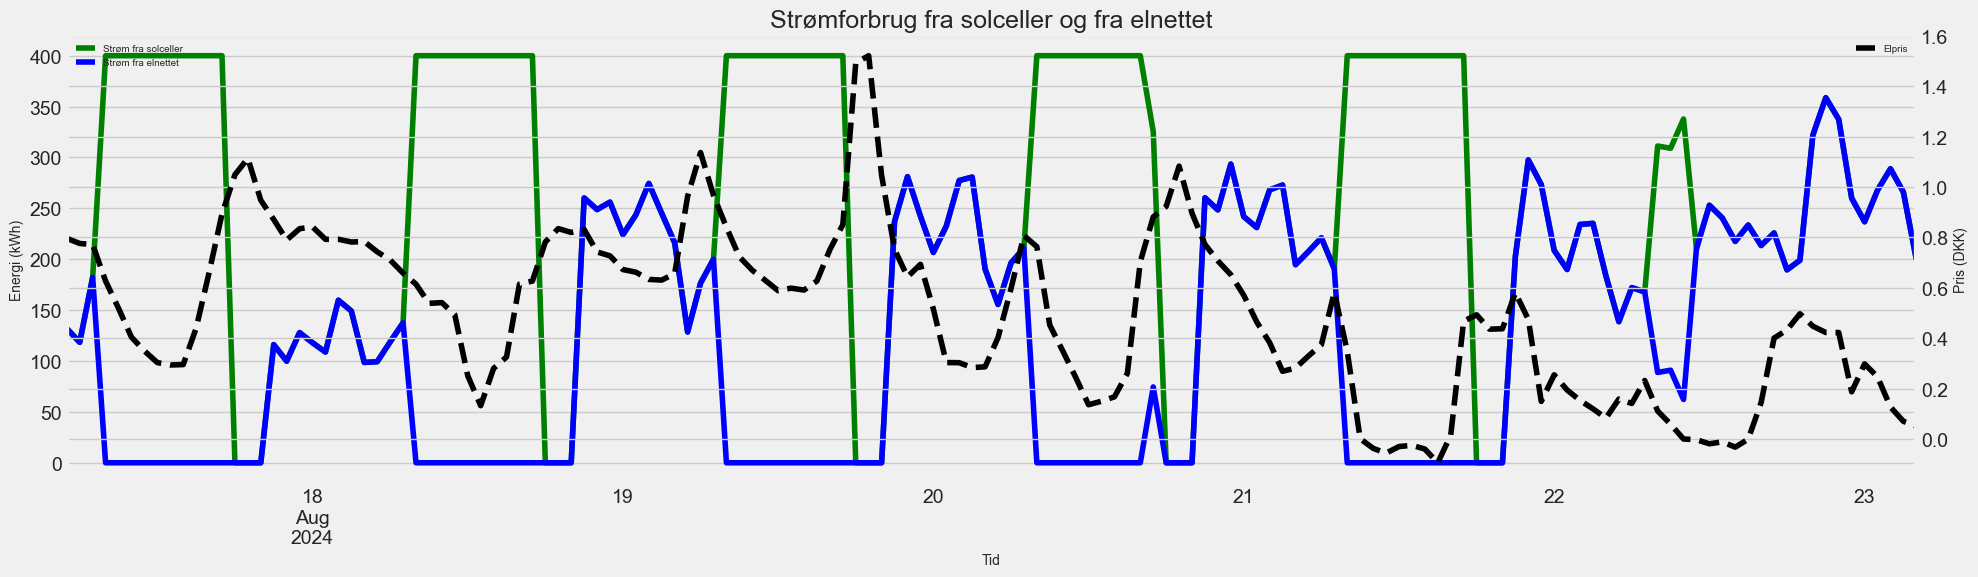

In [6]:
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

plt.style.use('fivethirtyeight')
# Create a new figure
fig, ax1 = plt.subplots(figsize=(20, 6))

# Plot energy_used on the primary y-axis
df_sim['energy_used'].iloc[:144].plot(ax=ax1, label="Strøm fra solceller", color='green')

# Plot energy_conv on the primary y-axis
df_sim['energy_conv'].iloc[:144].plot(ax=ax1, label="Strøm fra elnettet", color='blue')

# Add labels and legend for primary y-axis
ax1.set_xlabel("Tid", fontsize=10)
ax1.set_ylabel("Energi (kWh)", fontsize=10)
ax1.legend(loc='upper left', fontsize=7)

# Customize x-axis ticks with rotated labels
ax1.set_xticks(df_sim.index[:144][::6])
ax1.set_xticklabels(df_sim.index[:144][::6].strftime('%Y-%m-%d %H:%M'), rotation=45, fontsize=5)

# Create a secondary y-axis for pris
ax2 = ax1.twinx()
df_sim['pris'].iloc[:144].plot(ax=ax2, label="Elpris", color='black', linestyle='--')

# Add labels and legend for secondary y-axis
ax2.set_ylabel("Pris (DKK)", fontsize=10)
ax2.legend(loc='upper right', fontsize=7)

# Add title
plt.title("Strømforbrug fra solceller og fra elnettet", fontsize=18)

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

In [5]:
total_cost=df_sim['cost'].sum()
total_co2=df_sim['co2_cost'].sum()

print(f'Total cost: {total_cost} DKK')
print(f'Total CO2: {total_co2} kg')

Total cost: 234453.9319047 DKK
Total CO2: 47562.745077525404 kg


In [6]:
total_cost_frost=df_sim['cost_frost'].sum()
total_co2_frost=df_sim['co2_cost_frost'].sum()

print(f'Total cost frost: {total_cost_frost} DKK')
print(f'Total CO2 frost: {total_co2_frost} kg')

Total cost frost: 282445.2558045 DKK
Total CO2 frost: 59341.47 kg


In [8]:
total_energy=df_sim['energy_conv'].sum()
total_energy_frost=df_sim['frost_energy'].sum()

print(f'Total energy: {total_energy} kWh')
print(f'Total energy frost: {total_energy_frost} kWh')

Total energy: 383570.17 kWh
Total energy frost: 478559.78 kWh


In [10]:
cost_saved = (total_cost_frost - total_cost)/total_cost_frost
co2_saved = (total_co2_frost - total_co2)/total_co2_frost

print(f'Cost saved: {cost_saved*100}%')
print(f'CO2 saved: {co2_saved*100}%')

Cost saved: 16.991371925545156%
CO2 saved: 19.84906157949002%


In [68]:
columns_to_sum = ['frost_energy', 'energy_conv', 'cost', 'co2_cost', 'cost_frost', 'co2_cost_frost']
monthly_sum = df_sim.groupby(df_sim.index.month)[columns_to_sum].sum()

monthly_sum

,frost_energy,energy_conv,cost,co2_cost,cost_frost,co2_cost_frost
datetime,,,,,,
8,79297.12,42131.93,21549.573807,5224.356160,42378.289439,9832.80
9,150835.03,99081.74,55236.777726,12286.106797,81496.401253,18703.58
10,132459.07,129868.90,76422.043981,16103.729932,77195.966798,16424.90
11,115968.56,115968.56,81374.598313,14380.190000,81374.598313,14380.19


In [3]:
#sum the frost_energy columns where the hour is 18, 19, 20 and energy_conv is 0
frost_energy_sum = df_sim[(df_sim['hour'].isin([18, 19, 20])) & (df_sim['energy_conv'] == 0)]['frost_energy'].sum()
print(f'Frost energy sum: {frost_energy_sum} kWh')

Frost energy sum: 23527.56 kWh


In [4]:
co2_energy_sum = df_sim[(df_sim['hour'].isin([18, 19, 20])) & (df_sim['energy_conv'] == 0)]['co2'].sum()
print(f'Frost co2 sum: {co2_energy_sum} kg')

Frost co2 sum: 2917.4399999999996 kg


In [33]:
#save table to excel
monthly_sum.to_excel('C:/Users/Christian/Documents/Cand_merc/Data-Science-Project/data_science_project/Praktik/monthly_sum.xlsx')